<a href="https://colab.research.google.com/github/sonpvs/data-science/blob/main/phantich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Xác thực ổ đĩa Drive

from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
# Đọc file dữ liệu từ Drive
df = pd.read_csv('drive/My Drive/Colab Notebooks/01. BDG/data_tomtat.csv')

#df[['X1','X2']].head()

In [4]:
#df1 = df.iloc[:,0:17]
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,J1,J2,J3,J4,J5,J6,K1
0,0,47,7,18,2,2,4,2.0,3.250000,4.812500,4.031250,3.463068,3.926136,3.806818,3.881629
1,1,37,5,19,2,4,1,2.0,2.000000,3.250000,2.625000,2.534091,2.901515,2.686869,2.666246
2,2,28,9,18,3,2,5,1.0,2.333333,3.833333,3.083333,2.840909,3.348485,3.090909,3.088384
3,3,45,9,23,2,2,4,3.0,4.666667,4.666667,4.666667,4.666667,4.444444,4.592593,4.617284
4,4,28,11,23,2,2,4,3.0,3.666667,5.916667,4.791667,3.852273,5.037879,4.560606,4.637626


In [5]:
df = df.drop(df.columns[0], axis=1)  # df.columns is zero-based pd.Index  

In [ ]:
df.head()

In [13]:
df_ten = pd.read_excel('drive/My Drive/Colab Notebooks/01. BDG/Data_Header.xlsx')

In [14]:
df_ten['X1'][0]

'TUỔI'

In [15]:
list_ten = []

for st in df.columns:
  list_ten.append(df_ten[st][0])


In [16]:
list_ten

['TUỔI',
 'HỌC VẤN',
 'TUỔI KẾT HÔN',
 'HÔN NHÂN',
 'SỐ CON',
 'NGHỀ NGHIỆP',
 'THU NHẬP',
 'TB QUYỀN QUYẾT ĐỊNH SẢN XUẤT',
 'TB QUYẾT ĐỊNH TÍN DỤNG',
 'TB QUYẾT ĐỊNH CHI TIÊU GIA ĐÌNH',
 'TB QUYỀN SỞ HỮU TÀI SẢN',
 'TB QUYỀN THAM GIA XÃ HỘI',
 'TB QUYỀN SD THỜI GIAN',
 'TB BẤT BĐ GIỚI']

In [30]:
# Phân nhóm Tuoi
# Tuổi : 22 đến  29 =  1;   30 đến  45 = 2;   Trên 45 = 3

df['NhomTuoi']=0

def nhtuoi(a):
    if (a >= 22) & (a<=29):
       return 1
    elif (a >= 30) & (a<=45):
       return 2
    else:
       return 3


# Chạy từng dòng để nhóm độ tuổi
for row in df.index:
    c= df.iloc[row]['X1']
    df.iloc[row, df.columns.get_loc('NhomTuoi')] = nhtuoi(c)

In [21]:
df['NhomTuoi'].describe()

count    1370.000000
mean        1.816058
std         0.670601
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: NhomTuoi, dtype: float64

In [31]:
# Phân nhóm Hoc van
# Học vấn: 5 đến  7 = 0;   9 đến 15 = 1

df['NhomHocvan']=0

def nh_Hocvan(a):
    if (a >= 5) & (a<=8):
       return 0
    elif (a >= 9) & (a<=15):
       return 1

# Chạy từng dòng để nhóm học vấn
for row in df.index:
    c= df.iloc[row]['X2']
    df.iloc[row, df.columns.get_loc('NhomHocvan')] = nh_Hocvan(c)


In [24]:
df['NhomHocvan'].describe()

count    1370.000000
mean        0.630657
std         0.482803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: NhomHocvan, dtype: float64

In [43]:
# Phân nhóm Tuổi kết hôn
#Tuổi kết hôn: 16 đến 18 = 0; 19 đến  27 = 1

df['NhomTuoiKH']=0

def nh_TuoiKH(a):
    if (a >= 16) & (a<=18):
       return 0
    elif (a >= 19) & (a<=27):
       return 1

for row in df.index:
    c= df.iloc[row]['X3']
    df.iloc[row, df.columns.get_loc('NhomTuoiKH')] = nh_TuoiKH(c)

In [33]:
df['NhomTuoiKH'].describe()

count    1370.000000
mean        0.527007
std         0.499452
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: NhomTuoiKH, dtype: float64

In [34]:
# Phân nhóm Số con
# Số con: 1 đến 2 = 1; 3 đến 5 = 0 

df['NhomSocon']=0

def nh_TuoiSocon(a):
    if (a >= 1) & (a<=2):
       return 1
    elif (a >= 3) & (a<=5):
       return 0

for row in df.index:
    c= df.iloc[row]['X5']
    df.iloc[row, df.columns.get_loc('NhomSocon')] = nh_TuoiSocon(c)

In [29]:
df['NhomSocon'].describe()

count    1370.000000
mean        0.478832
std         0.499734
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: NhomSocon, dtype: float64

In [39]:
Tuoi_group = df.groupby(df['NhomTuoi'])
#Tuoi_group.describe()['J1']

for t in range(1,7):
  print('So sánh sự khác biệt giữa 3 nhóm tuổi (1,2,3) với biến số ',df_ten['J'+ str(t) + ''][0] )
  print('Trung bình của Nhóm 1:', "{:.2f}".format(Tuoi_group['J'+ str(t) + ''].mean()[1]))
  print('Trung bình của Nhóm 2:', "{:.2f}".format(Tuoi_group['J'+ str(t) + ''].mean()[2]))
  print('Trung bình của Nhóm 3:', "{:.2f}".format(Tuoi_group['J'+ str(t) + ''].mean()[3]))

So sánh sự khác biệt giữa 3 nhóm tuổi (1,2,3) với biến số  TB QUYỀN QUYẾT ĐỊNH SẢN XUẤT
Trung bình của Nhóm 1: 3.03
Trung bình của Nhóm 2: 3.02
Trung bình của Nhóm 3: 2.80
So sánh sự khác biệt giữa 3 nhóm tuổi (1,2,3) với biến số  TB QUYẾT ĐỊNH TÍN DỤNG
Trung bình của Nhóm 1: 5.48
Trung bình của Nhóm 2: 4.77
Trung bình của Nhóm 3: 4.60
So sánh sự khác biệt giữa 3 nhóm tuổi (1,2,3) với biến số  TB QUYẾT ĐỊNH CHI TIÊU GIA ĐÌNH
Trung bình của Nhóm 1: 4.26
Trung bình của Nhóm 2: 3.89
Trung bình của Nhóm 3: 3.70
So sánh sự khác biệt giữa 3 nhóm tuổi (1,2,3) với biến số  TB QUYỀN SỞ HỮU TÀI SẢN
Trung bình của Nhóm 1: 3.65
Trung bình của Nhóm 2: 3.36
Trung bình của Nhóm 3: 3.19
So sánh sự khác biệt giữa 3 nhóm tuổi (1,2,3) với biến số  TB QUYỀN THAM GIA XÃ HỘI
Trung bình của Nhóm 1: 4.28
Trung bình của Nhóm 2: 3.88
Trung bình của Nhóm 3: 3.71
So sánh sự khác biệt giữa 3 nhóm tuổi (1,2,3) với biến số  TB QUYỀN SD THỜI GIAN
Trung bình của Nhóm 1: 4.06
Trung bình của Nhóm 2: 3.71
Trung bình của 

In [41]:

Hocvan_group = df.groupby(df['NhomHocvan'])
#Tuoi_group.describe()['J1']

for t in range(1,7):
  print('So sánh sự khác biệt giữa 3 nhóm học vấn (0,1) với biến số ',df_ten['J'+ str(t) + ''][0] )
  print('Trung bình của Nhóm 0:', "{:.2f}".format(Hocvan_group['J'+ str(t) + ''].mean()[0]))
  print('Trung bình của Nhóm 1:', "{:.2f}".format(Hocvan_group['J'+ str(t) + ''].mean()[1]))

So sánh sự khác biệt giữa 3 nhóm học vấn (0,1) với biến số  TB QUYỀN QUYẾT ĐỊNH SẢN XUẤT
Trung bình của Nhóm 0: 2.55
Trung bình của Nhóm 1: 3.25
So sánh sự khác biệt giữa 3 nhóm học vấn (0,1) với biến số  TB QUYẾT ĐỊNH TÍN DỤNG
Trung bình của Nhóm 0: 4.41
Trung bình của Nhóm 1: 5.31
So sánh sự khác biệt giữa 3 nhóm học vấn (0,1) với biến số  TB QUYẾT ĐỊNH CHI TIÊU GIA ĐÌNH
Trung bình của Nhóm 0: 3.48
Trung bình của Nhóm 1: 4.28
So sánh sự khác biệt giữa 3 nhóm học vấn (0,1) với biến số  TB QUYỀN SỞ HỮU TÀI SẢN
Trung bình của Nhóm 0: 3.05
Trung bình của Nhóm 1: 3.66
So sánh sự khác biệt giữa 3 nhóm học vấn (0,1) với biến số  TB QUYỀN THAM GIA XÃ HỘI
Trung bình của Nhóm 0: 3.54
Trung bình của Nhóm 1: 4.25
So sánh sự khác biệt giữa 3 nhóm học vấn (0,1) với biến số  TB QUYỀN SD THỜI GIAN
Trung bình của Nhóm 0: 3.36
Trung bình của Nhóm 1: 4.06


In [44]:
#Tuổi kết hôn
TuoiKH_group = df.groupby(df['NhomTuoiKH'])

for t in range(1,7):
  print('So sánh sự khác biệt giữa 2 nhóm tuổi kết hôn (0,1) với biến số ',df_ten['J'+ str(t) + ''][0] )
  print('Trung bình của Nhóm 0:', "{:.2f}".format(TuoiKH_group['J'+ str(t) + ''].mean()[0]))
  print('Trung bình của Nhóm 1:', "{:.2f}".format(TuoiKH_group['J'+ str(t) + ''].mean()[1]))

So sánh sự khác biệt giữa 2 nhóm tuổi kết hôn (0,1) với biến số  TB QUYỀN QUYẾT ĐỊNH SẢN XUẤT
Trung bình của Nhóm 0: 2.77
Trung bình của Nhóm 1: 3.20
So sánh sự khác biệt giữa 2 nhóm tuổi kết hôn (0,1) với biến số  TB QUYẾT ĐỊNH TÍN DỤNG
Trung bình của Nhóm 0: 4.70
Trung bình của Nhóm 1: 5.23
So sánh sự khác biệt giữa 2 nhóm tuổi kết hôn (0,1) với biến số  TB QUYẾT ĐỊNH CHI TIÊU GIA ĐÌNH
Trung bình của Nhóm 0: 3.74
Trung bình của Nhóm 1: 4.21
So sánh sự khác biệt giữa 2 nhóm tuổi kết hôn (0,1) với biến số  TB QUYỀN SỞ HỮU TÀI SẢN
Trung bình của Nhóm 0: 3.24
Trung bình của Nhóm 1: 3.60
So sánh sự khác biệt giữa 2 nhóm tuổi kết hôn (0,1) với biến số  TB QUYỀN THAM GIA XÃ HỘI
Trung bình của Nhóm 0: 3.77
Trung bình của Nhóm 1: 4.18
So sánh sự khác biệt giữa 2 nhóm tuổi kết hôn (0,1) với biến số  TB QUYỀN SD THỜI GIAN
Trung bình của Nhóm 0: 3.58
Trung bình của Nhóm 1: 4.00


In [45]:
#Số con
Socon_group = df.groupby(df['NhomSocon'])

for t in range(1,7):
  print('So sánh sự khác biệt giữa 2 nhóm Số con (0,1) với biến số ',df_ten['J'+ str(t) + ''][0] )
  print('Trung bình của Nhóm 0:', "{:.2f}".format(Socon_group['J'+ str(t) + ''].mean()[0]))
  print('Trung bình của Nhóm 1:', "{:.2f}".format(Socon_group['J'+ str(t) + ''].mean()[1]))


So sánh sự khác biệt giữa 2 nhóm Số con (0,1) với biến số  TB QUYỀN QUYẾT ĐỊNH SẢN XUẤT
Trung bình của Nhóm 0: 2.72
Trung bình của Nhóm 1: 3.29
So sánh sự khác biệt giữa 2 nhóm Số con (0,1) với biến số  TB QUYẾT ĐỊNH TÍN DỤNG
Trung bình của Nhóm 0: 4.75
Trung bình của Nhóm 1: 5.23
So sánh sự khác biệt giữa 2 nhóm Số con (0,1) với biến số  TB QUYẾT ĐỊNH CHI TIÊU GIA ĐÌNH
Trung bình của Nhóm 0: 3.73
Trung bình của Nhóm 1: 4.26
So sánh sự khác biệt giữa 2 nhóm Số con (0,1) với biến số  TB QUYỀN SỞ HỮU TÀI SẢN
Trung bình của Nhóm 0: 3.23
Trung bình của Nhóm 1: 3.66
So sánh sự khác biệt giữa 2 nhóm Số con (0,1) với biến số  TB QUYỀN THAM GIA XÃ HỘI
Trung bình của Nhóm 0: 3.82
Trung bình của Nhóm 1: 4.17
So sánh sự khác biệt giữa 2 nhóm Số con (0,1) với biến số  TB QUYỀN SD THỜI GIAN
Trung bình của Nhóm 0: 3.59
Trung bình của Nhóm 1: 4.03


In [46]:
tencot = df.columns

In [47]:
tencot

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'J1', 'J2', 'J3', 'J4', 'J5',
       'J6', 'K1', 'NhomTuoi', 'NhomHocvan', 'NhomTuoiKH', 'NhomSocon'],
      dtype='object')

In [48]:
print(df['X2'].value_counts()) 

9     433
5     351
11    234
7     155
12    115
15     82
Name: X2, dtype: int64


In [54]:
df['X1_tmp'] = df['X1']
df['X1'] = df['NhomTuoi']

In [55]:
df['X2_tmp'] = df['X2']
df['X2'] = df['NhomHocvan']

In [57]:
df['X3_tmp'] = df['X3']
df['X3'] = df['NhomTuoiKH']

In [58]:
df['X5_tmp'] = df['X5']
df['X5'] = df['NhomSocon'] 

In [59]:
df.head(5)


,X1,X2,X3,X4,X5,X6,X7,J1,J2,J3,J4,J5,J6,K1,NhomTuoi,NhomHocvan,NhomTuoiKH,NhomSocon,X2_tmp,X3_tmp,X1_tmp,X5_tmp
0,3,0,0,2,1,4,2.0,3.250000,4.812500,4.031250,3.463068,3.926136,3.806818,3.881629,3,0,0,1,7,18,47,2
1,2,0,1,2,0,1,2.0,2.000000,3.250000,2.625000,2.534091,2.901515,2.686869,2.666246,2,0,1,0,5,19,37,4
2,1,1,0,3,1,5,1.0,2.333333,3.833333,3.083333,2.840909,3.348485,3.090909,3.088384,1,1,0,1,9,18,28,2
3,2,1,1,2,1,4,3.0,4.666667,4.666667,4.666667,4.666667,4.444444,4.592593,4.617284,2,1,1,1,9,23,45,2
4,1,1,1,2,1,4,3.0,3.666667,5.916667,4.791667,3.852273,5.037879,4.560606,4.637626,1,1,1,1,11,23,28,2


In [65]:
df02 = pd.DataFrame(df,columns=['X1','X2','X3','X4','X5','X6','X7','J1','J2','J3','J4','J5','J6','K1'])

In [66]:
df02

,X1,X2,X3,X4,X5,X6,X7,J1,J2,J3,J4,J5,J6,K1
0,3,0,0,2,1,4,2.0,3.250000,4.812500,4.031250,3.463068,3.926136,3.806818,3.881629
1,2,0,1,2,0,1,2.0,2.000000,3.250000,2.625000,2.534091,2.901515,2.686869,2.666246
2,1,1,0,3,1,5,1.0,2.333333,3.833333,3.083333,2.840909,3.348485,3.090909,3.088384
3,2,1,1,2,1,4,3.0,4.666667,4.666667,4.666667,4.666667,4.444444,4.592593,4.617284
4,1,1,1,2,1,4,3.0,3.666667,5.916667,4.791667,3.852273,5.037879,4.560606,4.637626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1,1,0,2,1,1,2.0,1.916667,3.979167,2.947917,2.531250,3.229167,2.902778,2.917824
1366,2,1,0,1,0,5,2.0,3.166667,6.041667,4.604167,3.619318,4.405303,4.209596,4.341120
1367,1,1,1,2,1,4,3.0,4.416667,6.604167,5.510417,4.866477,5.232955,5.203283,5.305661
1368,1,1,1,2,0,5,2.0,2.666667,6.416667,4.541667,3.784091,4.734848,4.353535,4.416246


In [71]:

tencot = df02.columns
df02.columns = list_ten

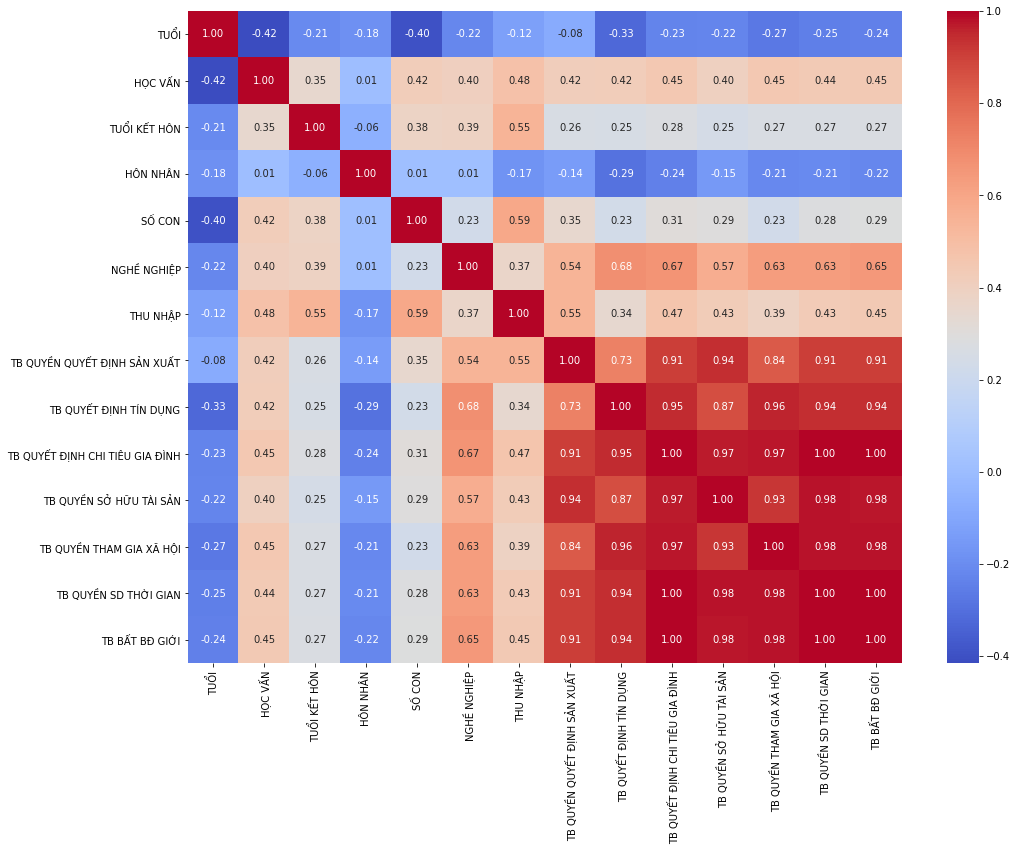

In [72]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df02.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

%
% a1=pd.crosstab(df1.A09, df1.A14).plot(kind='bar')
% a2=pd.crosstab(df1.A05, df1.A15)
% a2.plot(kind='bar')
% a2.plot.bar(figsize=(12,5), stacked=True)
% a3=df['A2']
% df.groupby(['A2']).count()
% df_csv2= df[['A01','A10','BTB']]
% df_csv2.describe()
% a2=pd.crosstab(df['A10'], df['BTB']).plot(kind='bar')
% plt.figure(figsize=(12,8)) 
% sns.heatmap(a2, annot=True, cmap="YlGnBu")

%# Chi-square test of independence. 
% c, p, dof, expected = chi2_contingency(a2) 
% Print the p-value
% print('p = ',p)
% print('c = ',c)
% print('dof = ',dof)
% print('expected = ',expected)#

% # Chi-square test of independence. 
% c, p, dof, expected = chi2_contingency(a4) 
% Print the p-value
% print('p = ',p)
% print('c = ',c)
% print('dof = ',dof)
% print('expected = ',expected)

% import scipy.stats as stats
% # Perform the ANOVA
% stats.f_oneway(Mot, Hai, Ba, Bon, Nam, Sau)

% import statsmodels.api as sm
% from statsmodels.formula.api import ols

% model = ols('A13 ~ BTB',data = df_csv3).fit() # Model formula
                
% anova_result = sm.stats.anova_lm(model, typ=2)
% print (anova_result)
% model.summary()